In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

In [2]:
df = pd.read_csv('C:\\Users\\Dell\\Desktop\\Python Notebooks\\AI 201\\HEART ATTACK\\heart_dataset.csv')

In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
# One Hot Encoding columns Sex, CP, FBS, RestECG, Exang, Slope, CA, and Thal
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 5, 6, 8, 10, 11, 12])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:, [0, 3, 4, 7, 9]] = sc.fit_transform(X[:, [0, 3, 4, 7, 9]])

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [7]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.1, max_iter=300, penalty='l2', solver='lbfgs', random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1, max_iter=300, random_state=0)

In [8]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [9]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[139  31]
 [ 36 172]]
0.8227513227513228


In [10]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_test, y_test, cv = 10)
print("Cross-Validation Accuracy Scores", scores.mean())

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Cross-Validation Accuracy Scores 0.8043385490753913


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

Accuracy Score: 0.8227513227513228
Precision Score: 0.8234524461125446
Recall Score: 0.8227513227513228
F1 Score: 0.8229575784849243


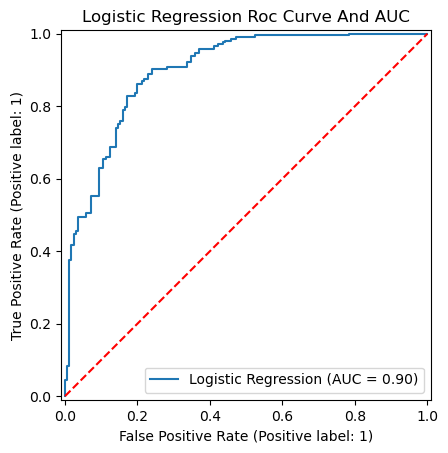

In [12]:
#plot_roc_curve(classifier, X_test, y_test, name = "Logistic Regression")
#plt.title("Logistic Regression Roc Curve And AUC")
#plt.plot([0, 1], [0, 1], "r--")
#plt.show()
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(estimator=classifier, X=X_test, y=y_test, name = "Logistic Regression")
plt.title("Logistic Regression Roc Curve And AUC")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

In [13]:
# Define the parameter grid
# param_grid = {
#     'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     'C': [0.01, 0.1, 1, 10, 100],
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#     'max_iter': [100, 200, 300]
# }

# # Initialize the GridSearchCV object
# grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # Print the best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)